In [1]:
import os
os.environ["SNUDDA_DATA"] = "../../../../BasalGangliaData/data/"
assert os.path.isdir(os.getenv("SNUDDA_DATA")), f"You need to have BasalGangliaData installed for this example. You can run this example without it, but then do not execute this cell."

In [2]:
network_path = "FS_gap_junction_coupling_simulation"
experiment_config_file = "FS_gap_junction_experiment-0.json"

In [3]:
# 80500 neurons per mm3, 1.3% are FS.
n_FS = 100
d_cube = (nFS/(80500 * 0.013))**(1/3) * 1e-3

from snudda.place import create_cube_mesh
mesh_file = os.path.join(network_path, "mesh", "volume.obj")
create_cube_mesh(mesh_file, [0,0,0], d_cube, "FS network volume")

In [4]:
from snudda.init import SnuddaInit
si = SnuddaInit(network_path=network_path, random_seed=123)

si.define_structure(struct_name="StriatalVolume", struct_mesh=mesh_file, d_min=15e-6, mesh_bin_width=50e-6)

si.add_neurons(name="FS", num_neurons=n_FS, volume_id="StriatalVolume",
               neuron_dir=os.path.join("$SNUDDA_DATA","neurons","striatum","fs"))

cluster_FS_synapses = True
cluster_FS_gap_junctions = False
FS_gGABA = [1.1e-9, 1.5e-9]
FS_gGapJunction = [0.5e-9, 0.1e-9]

if False:
    # For this example we just want gap junctions, just listing GABA here for completness
    si.add_neuron_target(neuron_name="FS",
                         target_name="FS",
                         connection_type="GABA",
                         dist_pruning=None,
                         f1=0.15, soft_max=5, mu2=2, a3=1,
                         conductance=FS_gGABA,
                         cluster_synapses=cluster_FS_synapses,
                         mod_file="tmGabaA",
                         channel_param_dictionary={"tau1": (1.33e-3, 1e3),
                                                   "tau2": (5.7e-3, 1e3)})
    
si.add_neuron_target(neuron_name="FS",
                     target_name="FS",
                     connection_type="GapJunction",
                     dist_pruning=None,
                     f1=0.7, soft_max=8, mu2=2, a3=1.0,
                     conductance=FS_gGapJunction,
                     cluster_synapses=cluster_FS_gap_junctions,
                     channel_param_dictionary=None)

si.write_json()

Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Writing FS_gap_junction_coupling_simulation/network-config.json


In [5]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

from snudda.detect import SnuddaDetect
sd = SnuddaDetect(network_path=network_path)
sd.detect()

from snudda.detect import SnuddaPrune
spr = SnuddaPrune(network_path=network_path)
spr.prune()

No d_view specified, running distribute neurons in serial
Processing hyper voxel : 128/392 (100 neurons)
Processing hyper voxel : 135/392 (99 neurons)
Processing hyper voxel : 136/392 (99 neurons)
Processing hyper voxel : 184/392 (98 neurons)
Processing hyper voxel : 191/392 (97 neurons)
Processing hyper voxel : 129/392 (95 neurons)
Processing hyper voxel : 192/392 (92 neurons)
Processing hyper voxel : 185/392 (91 neurons)
Processing hyper voxel : 72/392 (34 neurons)
Processing hyper voxel : 79/392 (34 neurons)
Processing hyper voxel : 80/392 (32 neurons)
Processing hyper voxel : 134/392 (32 neurons)
Processing hyper voxel : 143/392 (30 neurons)
Processing hyper voxel : 73/392 (29 neurons)
Processing hyper voxel : 142/392 (29 neurons)
Processing hyper voxel : 127/392 (28 neurons)
Processing hyper voxel : 122/392 (23 neurons)
Processing hyper voxel : 137/392 (23 neurons)
Processing hyper voxel : 121/392 (21 neurons)
Processing hyper voxel : 247/392 (21 neurons)
Processing hyper voxel : 

In [6]:
!nrnivmodl $SNUDDA_DATA/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks/FS-network
Mod files: "../../../../BasalGangliaData/data//neurons/mechanisms/bk_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/bk_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/bk_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/ca_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cadyn_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cadyn_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cal12_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cal13_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cal_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/caldyn_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/can_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/can_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cap_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/ca

In [7]:
from snudda.simulate.pair_recording import PairRecording

pr = PairRecording(network_path=network_path, experiment_config_file=experiment_config_file)
pr.run()

Loading 100 neurons with 0 synapses and 12944 gap junctions
Found 25888 local gap junctions on node.
Running simulation for 1.2 s
Running Neuron simulator 1200 ms, with dt=0.025
1% done. Elapsed: 8.6 s, estimated time left: 855.2 s
12% done. Elapsed: 118.7 s, estimated time left: 870.2 s
20% done. Elapsed: 228.0 s, estimated time left: 912.1 s
29% done. Elapsed: 334.6 s, estimated time left: 819.1 s
41% done. Elapsed: 441.4 s, estimated time left: 635.1 s
53% done. Elapsed: 542.6 s, estimated time left: 481.2 s
64% done. Elapsed: 654.5 s, estimated time left: 368.1 s
74% done. Elapsed: 761.3 s, estimated time left: 267.5 s
86% done. Elapsed: 863.1 s, estimated time left: 140.5 s
97% done. Elapsed: 982.4 s, estimated time left: 30.4 s
99% done. Elapsed: 1044.1 s, estimated time left: 10.5 s
Neuron simulation finished
Simulation run time: 1057.3 s
Writing network output to FS_gap_junction_coupling_simulation/simulation/FS-gap-junction-output.hdf5


In [8]:
%matplotlib notebook
from snudda.analyse.analyse_gap_junction_coupling import AnalyseGapJunctionCoupling
ac = AnalyseGapJunctionCoupling(network_path=network_path, 
                                experiment_config_file=experiment_config_file)

Loading 100 neurons with 0 synapses and 12944 gap junctions
Loading FS_gap_junction_coupling_simulation/simulation/FS-gap-junction-output.hdf5


<IPython.core.display.Javascript object>


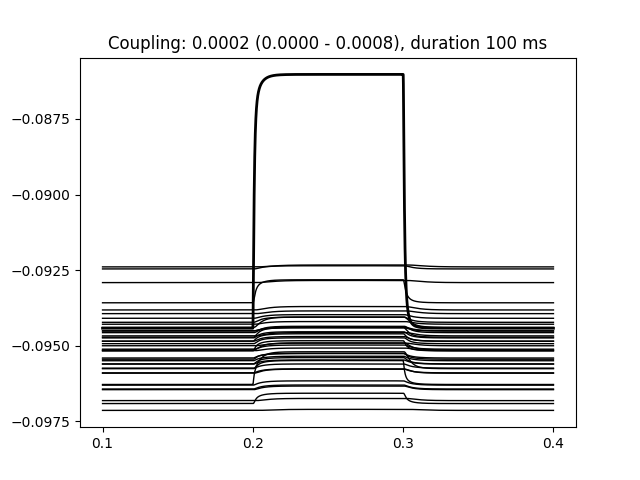

<IPython.core.display.Javascript object>


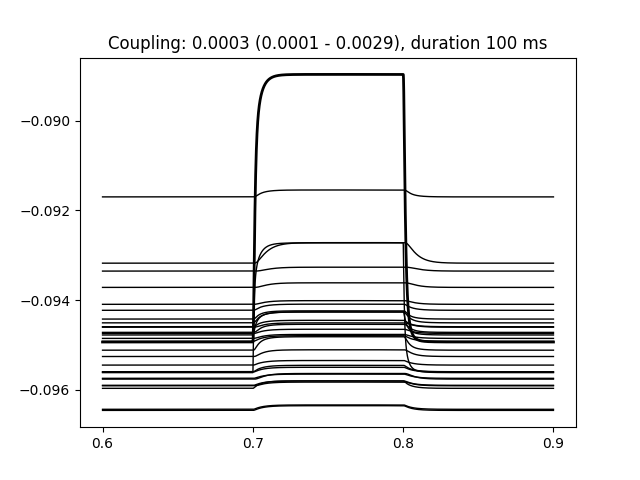

In [9]:
ac.plot_coupling(duration=0.100, amplitude=None)

<IPython.core.display.Javascript object>


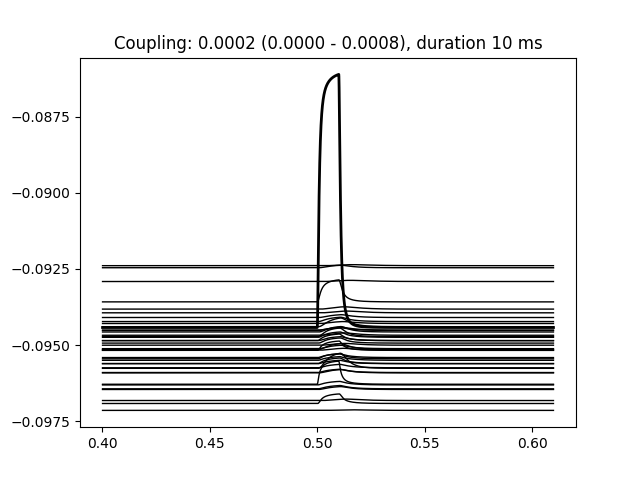

<IPython.core.display.Javascript object>


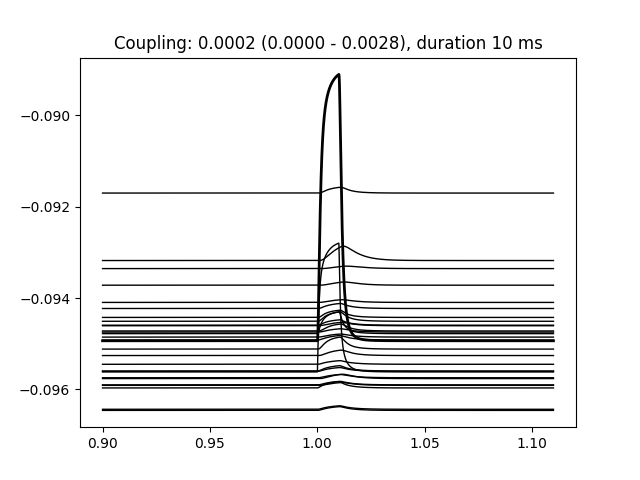

In [10]:
ac.plot_coupling(duration=0.010, amplitude=None)

In [11]:
import os
from snudda.analyse.analyse import SnuddaAnalyse
sa = SnuddaAnalyse(hdf5_file=os.path.join(network_path, "network-synapses.hdf5"))

Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Loading 100 neurons with 0 synapses and 12944 gap junctions
Number of neurons: 100
Created connection matrix 0.0002198210004280554 seconds
GJ row : 0 - 0.0 %  time : 0.002072029999908409 seconds
Created gap junction connection matrix 0.037637542999618745 seconds
Creating population dictionary
Done.
!!! Setting sideLen to None
Calculating synapse distance histogram
Creating dist histogram
Created distance histogram (optimised) in 0.0013986169997224351 seconds
Saving cache to FS_gap_junction_coupling_simulation/network-synapses.hdf5-cache


Plotting connection probability FS to FS (gapjunctions)
Centering in None : Keeping 100/100
Counting connections
Requested: 10000000.0 calculated [9900.]


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1367: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


<IPython.core.display.Javascript object>


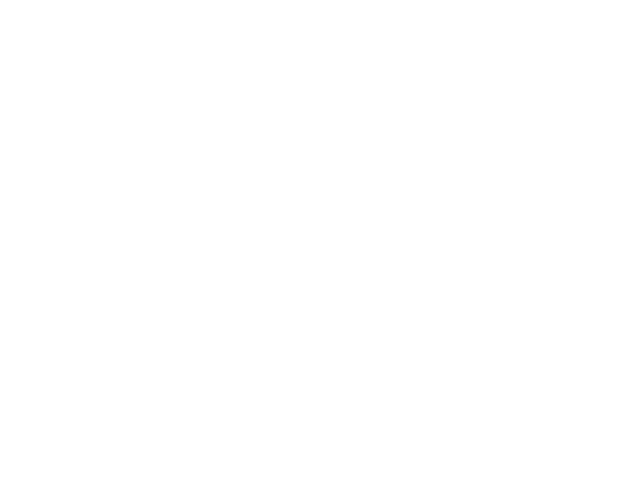

P(d<0.00025) = 0.25383838383838386
P(d<0.00025) = 0.25383838383838386
Wrote FS_gap_junction_coupling_simulation/figures/Network-distance-dependent-connection-probability-FS-to-FS-gapjunctions-3D-dist.pdf


In [12]:
# Koos & Tepper 1999, 2/6
sa.plot_connection_probability("FS", "FS",
                               dist_3d=True,
                               connection_type="gapjunctions",
                               exp_max_dist=[250e-6, 250e-6],
                               exp_data=[2 / 6.0, 3 / 7.0],
                               exp_data_detailed=[(2, 6), (3, 7)], )

Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 100/100
Calculating max synapses
Calculating mean synapses
Plotting 2513 connections


<IPython.core.display.Javascript object>


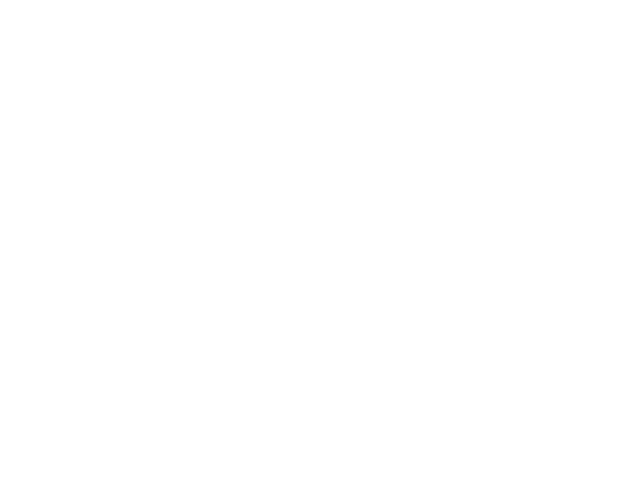

Wrote FS_gap_junction_coupling_simulation/figures/Network-number-of-gapjunctions-from-FS-to-FS-per-cell.pdf


In [13]:
sa.plot_num_synapses_per_pair("FS", "FS", connection_type="gapjunctions")

Calculating number of incoming connections FS -> FS
Centering in None : Keeping 100/100
#pre = 100, #post = 100


<IPython.core.display.Javascript object>


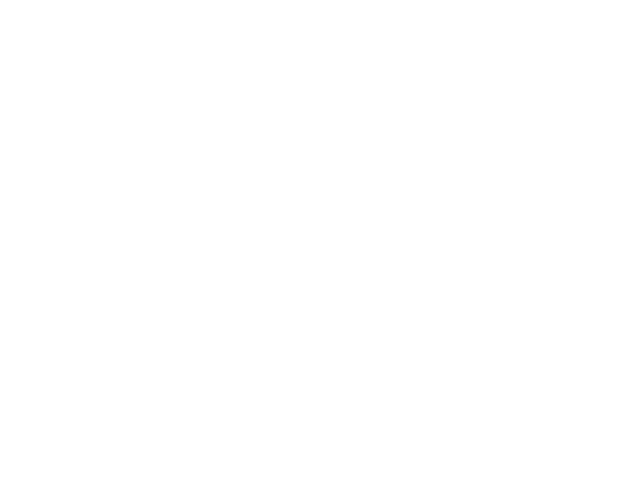

Wrote FS_gap_junction_coupling_simulation/figures/Network-gapjunctions-input-to-FS-from-FS.pdf


<IPython.core.display.Javascript object>


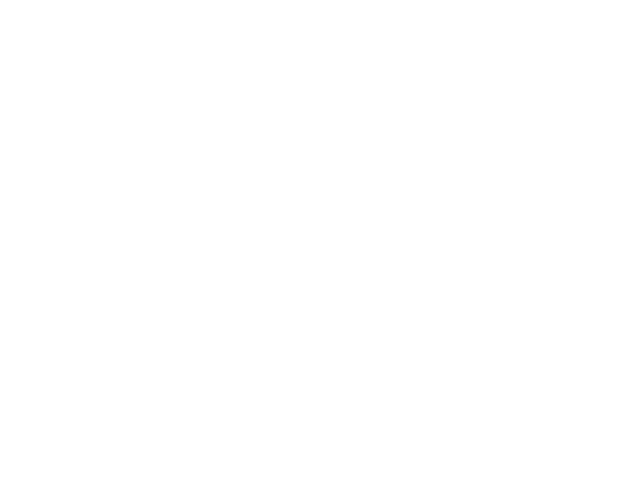

Wrote FS_gap_junction_coupling_simulation/figures/Network-gapjunctions-to-FS-from-FS.pdf


<IPython.core.display.Javascript object>


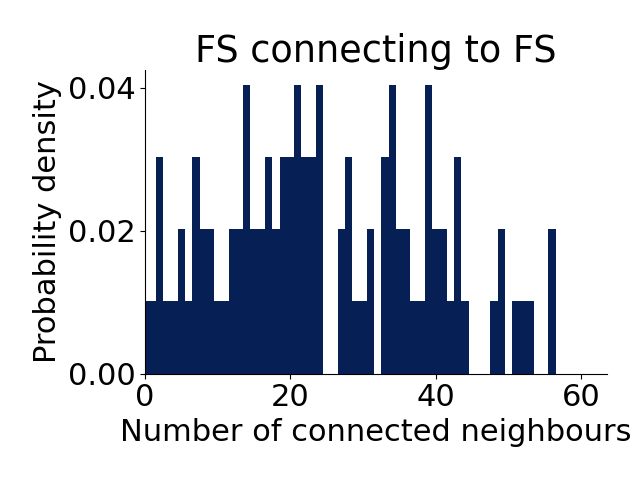

In [14]:
sa.plot_incoming_connections(neuron_type="FS", pre_type="FS", connection_type="gapjunctions")